In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
loans_2007 = pd.read_csv('F:/Columbia/DA/project/lending-club-loan-data/lending_club_loans.csv') 

C:\Users\pangyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3>Does prople of different grades have different sentiment in their description?
<h4>Applicants provide description for their purpose.

In [2]:
#Setting up dictionary
import nltk
from nltk.book import *
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:  #not: 不为空
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
#text mining

loans_all = loans_2007.copy()
loans_all =loans_all[['id','member_id','loan_amnt','funded_amnt','desc','grade','purpose','addr_state','loan_status']]

from nltk import word_tokenize
l=[]
for i in loans_all['desc'].tolist():
    i = str(i)
    cpos = cneg = lpos = lneg = 0
    if len(word_tokenize(i)) == 0:
        l.append((0, 0, 0)) 
    else:
        for word in word_tokenize(i):
            if word in positive_words:
                cpos+=1
            if word in negative_words:
                cneg+=1
        l.append((cpos/len(word_tokenize(i))*100,cneg/len(word_tokenize(i))*100,(cpos-cneg)/len(word_tokenize(i))*100))  

cpos_l=list()
cneg_l=list()
c_l=list()
for i in l:
    cpos_l.append(i[0])
    cneg_l.append(i[1])
    c_l.append(i[2])
loans_all['cpos']=cpos_l
loans_all['cneg']=cneg_l
loans_all['cpos-cneg']=c_l

loans_all.to_csv('F:/Columbia/DA/project/lending-club-loan-data/loans_all.csv', sep=',', encoding='utf-8')



KeyboardInterrupt: 

In [4]:
loans_all = pd.read_csv('F:/Columbia/DA/project/lending-club-loan-data/loans_all.csv')

<h3>Two groups with extrem positive attitudes are people who rejected later by the company.

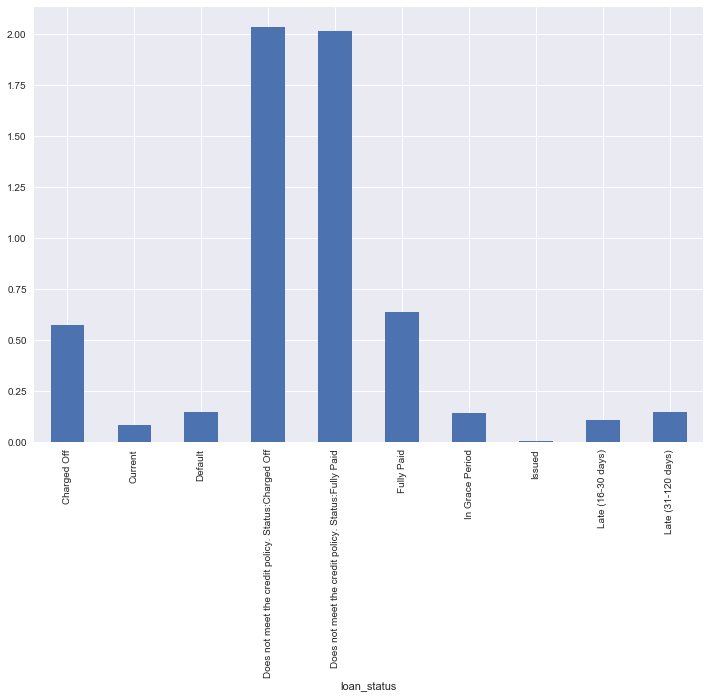

In [5]:
loans_all['cpos'].groupby(loans_all['loan_status']).mean().plot(kind='bar')

<h3>If we look at grades, we find that people in highest and lowest grade group have extrem positive attitude
<h4>This is easy to understand: people with high grades are confident, while people with low grades have intention to speak highly of themselves.

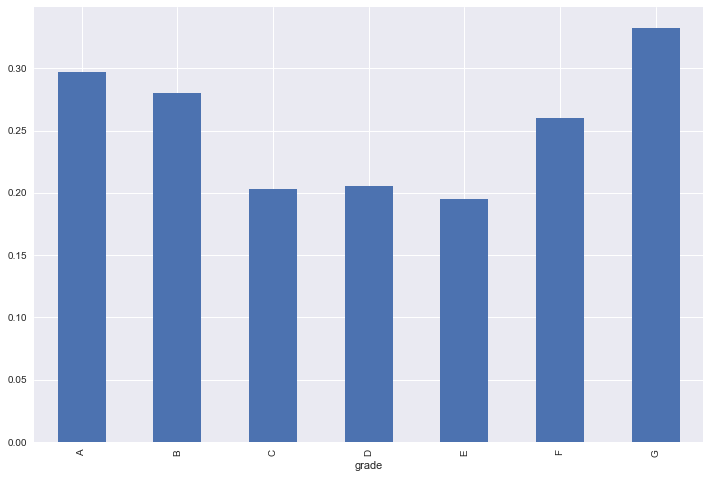

In [19]:
loans_all['cpos'].groupby(loans_all['grade']).mean().plot(kind='bar')

<h3>Which kind of loan (purpose) is the most likely to be default? 
<h3>Are there any differences among grades?
<h4>We are interested in the type of defaulted loan.

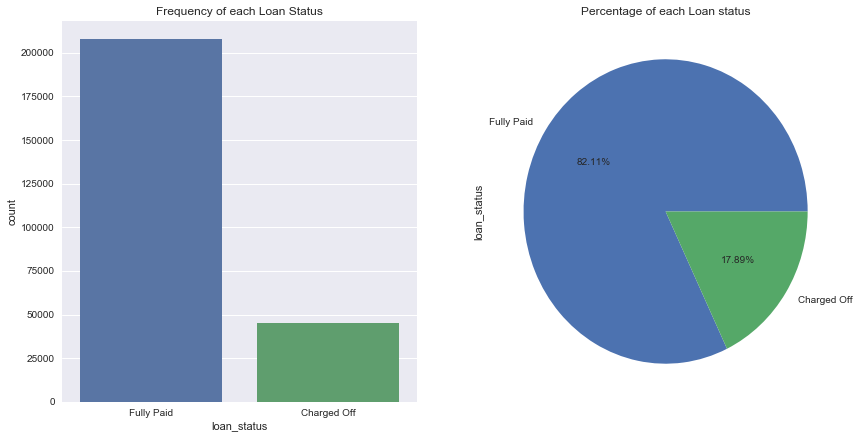

In [7]:
#Among 10 kinds of purposes, we only cares about 'Fully paid' and 'Chareged off'
loans_2007_sub = loans_2007[(loans_2007["loan_status"] == "Fully Paid") |
                            (loans_2007["loan_status"] == "Charged Off")]
filtered_loans = loans_2007_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()
#Nearly 20% of loans were default!

In [8]:
#Assign dummy variable to loan status
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
filtered_loans = filtered_loans.replace(mapping_dictionary)

<h4>Firstly, let's see the results from the whole data set
<h4>Small business is the most risky one!

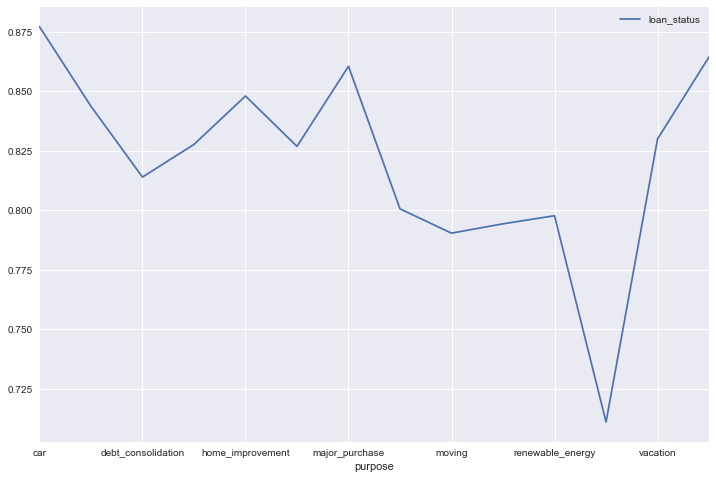

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,3198,3646,0.877126
credit_card,42250,50076,0.843718
debt_consolidation,120764,148363,0.813977
educational,269,325,0.827692
home_improvement,12660,14929,0.848014
house,1366,1652,0.826877
major_purchase,5391,6265,0.860495
medical,2285,2854,0.800631


In [10]:
purpose_=pd.pivot_table(filtered_loans, index = 'purpose',values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot()) 
purpose_

<h4>Now, let's see what happens on groups with different grades.

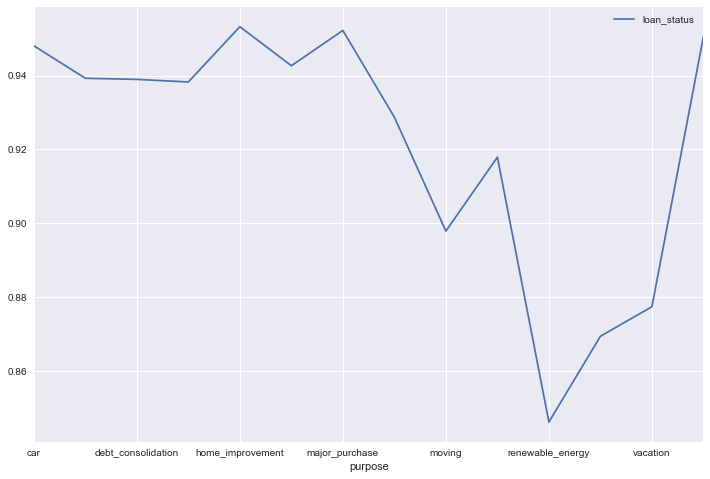

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,1187,1252,0.948083
credit_card,9622,10244,0.939282
debt_consolidation,19558,20829,0.938979
educational,76,81,0.938272
home_improvement,3283,3444,0.953252
house,296,314,0.942675
major_purchase,1794,1884,0.952229
medical,417,449,0.928731


In [11]:
A_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'A'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(A_purpose_['mean'].plot())
A_purpose_  #renewable energy 0.846154


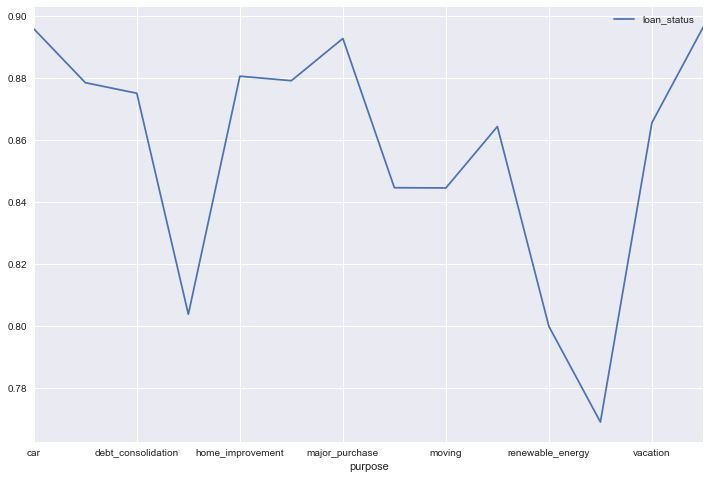

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,982,1096,0.895985
credit_card,16215,18455,0.878624
debt_consolidation,38518,44010,0.875210
educational,82,102,0.803922
home_improvement,3817,4334,0.880711
house,335,381,0.879265
major_purchase,1567,1755,0.892877
medical,506,599,0.844741


In [13]:
B_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'B'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(B_purpose_['mean'].plot())
B_purpose_  #small business 0.769150;education 0.803922


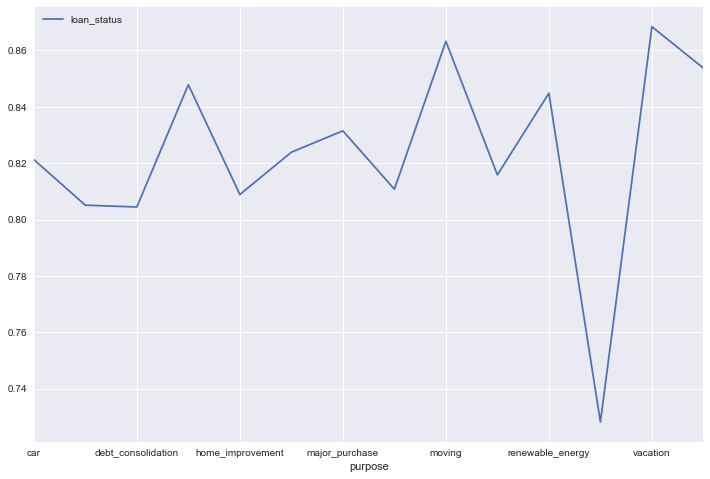

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,579,705,0.821277
credit_card,10145,12601,0.805095
debt_consolidation,32622,40551,0.804468
educational,78,92,0.847826
home_improvement,2823,3490,0.808883
house,262,318,0.823899
major_purchase,1115,1341,0.831469
medical,557,687,0.810771


In [14]:
C_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'C'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(C_purpose_['mean'].plot())
C_purpose_   #small business 0.728177; 


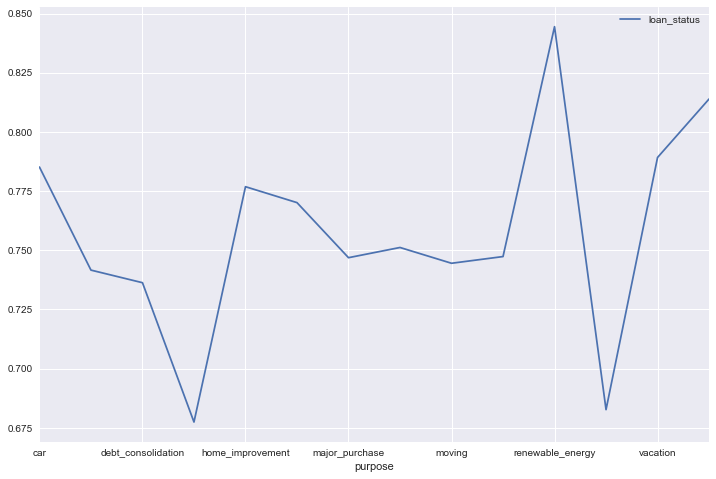

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,296,377,0.785146
credit_card,4328,5836,0.741604
debt_consolidation,18449,25057,0.736281
educational,21,31,0.677419
home_improvement,1570,2021,0.776843
house,201,261,0.770115
major_purchase,593,794,0.746851
medical,486,647,0.751159


In [15]:
D_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'D'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(D_purpose_['mean'].plot())
D_purpose_  #education 0.677419, small business 0.682653


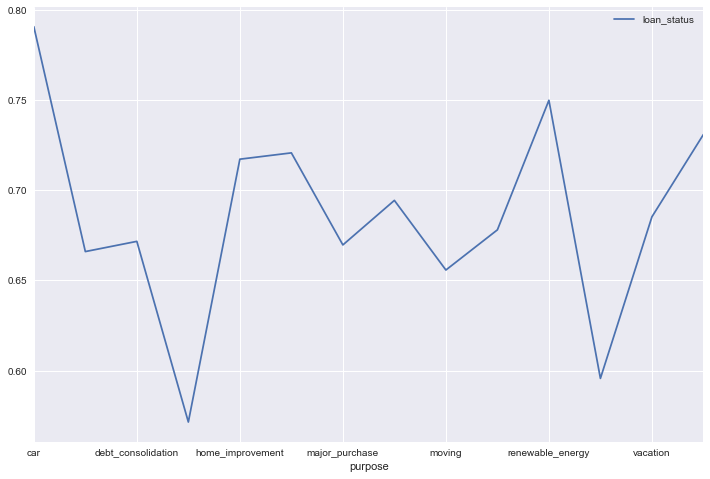

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,121,153,0.790850
credit_card,1406,2111,0.666035
debt_consolidation,8131,12105,0.671706
educational,8,14,0.571429
home_improvement,779,1086,0.717311
house,142,197,0.720812
major_purchase,219,327,0.669725
medical,225,324,0.694444


In [18]:
E_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'E'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(E_purpose_['mean'].plot())
E_purpose_ #education 0.571429, small business 0.595645


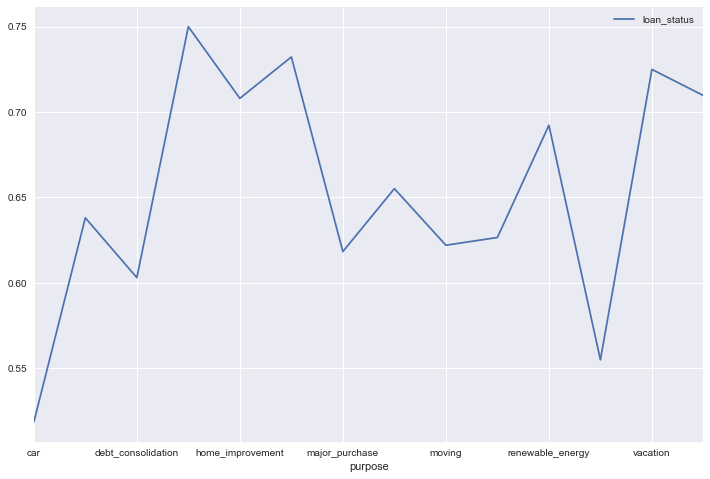

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,28,54,0.518519
credit_card,439,688,0.638081
debt_consolidation,2835,4701,0.603063
educational,3,4,0.750000
home_improvement,308,435,0.708046
house,93,127,0.732283
major_purchase,81,131,0.618321
medical,76,116,0.655172


In [17]:
F_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'F'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(F_purpose_['mean'].plot())
F_purpose_ #car 0.518519 


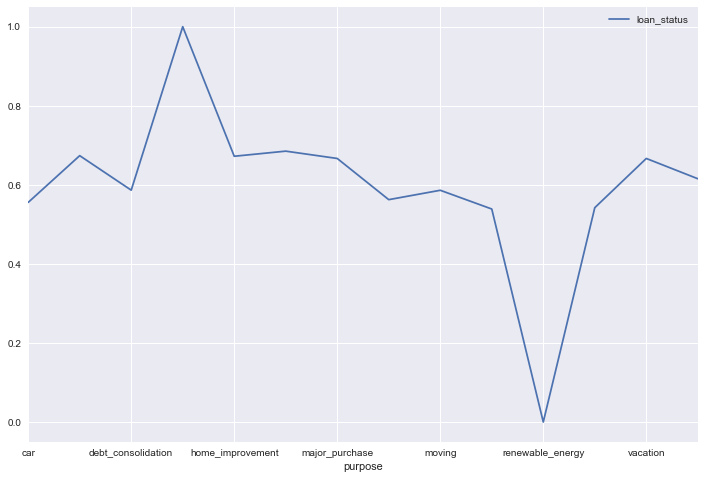

,sum,len,mean
,loan_status,loan_status,loan_status
purpose,,,
car,5,9,0.555556
credit_card,95,141,0.673759
debt_consolidation,651,1110,0.586486
educational,1,1,1.000000
home_improvement,80,119,0.672269
house,37,54,0.685185
major_purchase,22,33,0.666667
medical,18,32,0.562500


In [16]:
G_purpose_=pd.pivot_table(filtered_loans[filtered_loans['grade'] == 'G'], index = 'purpose',
                          values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(G_purpose_['mean'].plot())
G_purpose_ #renewable energy 0
